# Qu'est-ce qui rend les gens a l'aise en informatique ?

Les vieux sont-ils plus nuls que les jeunes ? Ou bien est-ce un probleme d'education ?

Parmi tous les repondants quels sont ceux qui declarent s'en sortir le mieux ?

N.B : Le premier module, comme pour le NoteBook generale initiase/definit le tableau de reponses (form_responses), la structure du questionnaire, son titre, le nombre de repondant et mes parametres graphiques pour afficher les graphs ensuite.

In [1]:
# Ici, j'importe des fonctions que j'ai definies ailleurs, afin de proposer un NoteBook avec assez peu de code
import mbr_typeform as mbrtf
import mbr_plots as mbrpl


# Charger en memoire la structure du questionnaires et les reponses associees
tfs = mbrtf.mbr_typeFrom(formid='YvBfAdHB')
# A partir de cette fonction, on recupere en memoire : Le tableau de toutes les reponses, le nombre de reponses, et l aliste des groupes de questions du questionnaire
form_responses = tfs.form_results
nb_responses = form_responses.shape[0]
form_groups = tfs.form_groups


# La j'initialise des fonctions graphiques que j'ai faite, car j'aime bien avoir toujours les memes styles dans mes graphiques
myfig = mbrpl.plots_mbr_tf()

Group 1 : Apprenons à  se connaître
Group 2 : Votre rapport au numérique...
Group 3 : Enseignement et éducation...
Group 4 : L'offre culturelle numérique
Group 5 : Les sujets qui vous interessent
Group 6 : Pour conclure


## Ceux qui voient l'IT comme une benediction, combien se donnent-il ?

In [2]:
g_idx = 1
q_id = 'rT2VhptKefBR'

# Get labels and results
q_bene, l_bene_lbl, l_bene_dtfs = tfs.get_results(gidx=g_idx,qid=q_id)

# Rappel des options :
print("Rappel des options possibles :\n ",l_bene_lbl)

Rappel des options possibles :
  ['Bénédiction', 'Malédiction', 'Drôle de question']


In [3]:
# nombre reponse totale du subset
nbresp_subset = l_bene_dtfs[0].shape[0]

g_idx2 = 1
q_id2 = 'IihvSDBsSpUH'
# Get labels and results
q_confiance, confiance_lbls, confiance_dtfs = tfs.get_sub_question_data(gidx=g_idx2, qid=q_id2, inputdtf = l_bene_dtfs[0]) 

# Rappel des options :
print("Rappel des options possibles :\n ",confiance_lbls)

Rappel des options possibles :
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


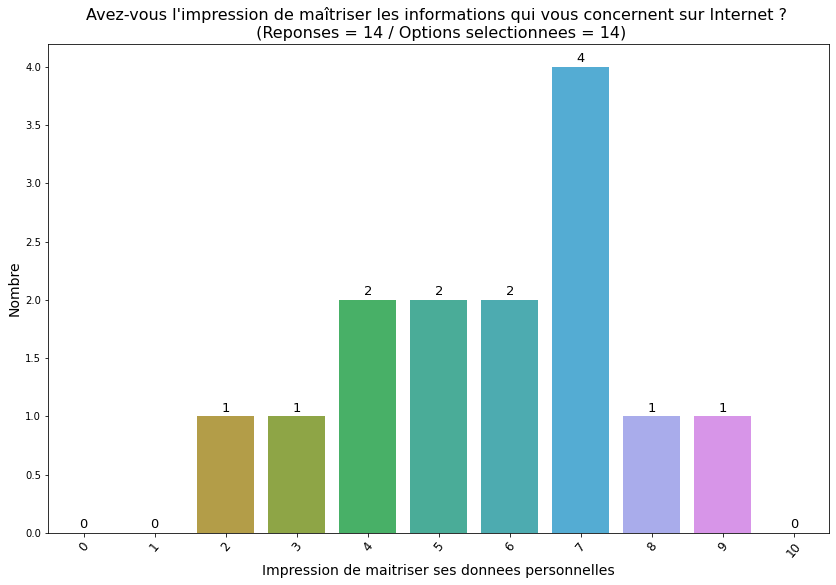

In [4]:
myfig.plot_mbr_barchart(qtitle = q_confiance, list_labels = confiance_lbls, list_dfs = confiance_dtfs, bar_xlabel = "Impression de maitriser ses donnees personnelles", bar_ylabel = 'Nombre', nb_responses = nbresp_subset)

In [5]:
moyenne_maitrise = mbrpl.moyenne_generale_note(liste_notes = confiance_lbls, liste_dtfs = confiance_dtfs, nbresp = nbresp_subset)

print('Moyenne generale : '+str(moyenne_maitrise))

Moyenne generale : 5.714285714285714


C'est varie, encore une fois, l'apprehension spirituelle d'un objet n'est pas necessairement lie a notre aisance avec. Certaines personnes ont une vie tres dure pourtant ils cherissent la Vie.

# Specialite = IT - Croisement de donnees

## Aisance avec les outils numeriques

In [6]:
gidx = 0
qid = 'OnnjlaZauNJ0'

# Get labels and results
qScpecialite, spec_lbls, spec_dtfs = tfs.get_results(gidx=gidx,qid=qid)

# Rappel des options :
print("Rappel des specialites possibles :\n ",spec_lbls)

Rappel des specialites possibles :
  ["Services d'informations", 'Budget / Finance / Compta', 'Juridique / Droits', 'Bâtiment / Sécurité physique', 'Développement commercial', 'Communication / Partenariats / Evénementiel', 'Ressources humaines / Santé / Social', 'Restauration / Tourisme', 'Other']


In [7]:
# nombre reponse totale du subset
nbresp_subset = spec_dtfs[0].shape[0]

g_idx2 = 1
q_id2 = 'bK9T5Pen4AB0'
# Get labels and results
q_aisance, aisance_lbls, aisance_dtfs = tfs.get_sub_question_data(gidx=g_idx2, qid=q_id2, inputdtf = spec_dtfs[0]) 

# Rappel des options :
print("Rappel des options possibles :\n ",aisance_lbls)

Rappel des options possibles :
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


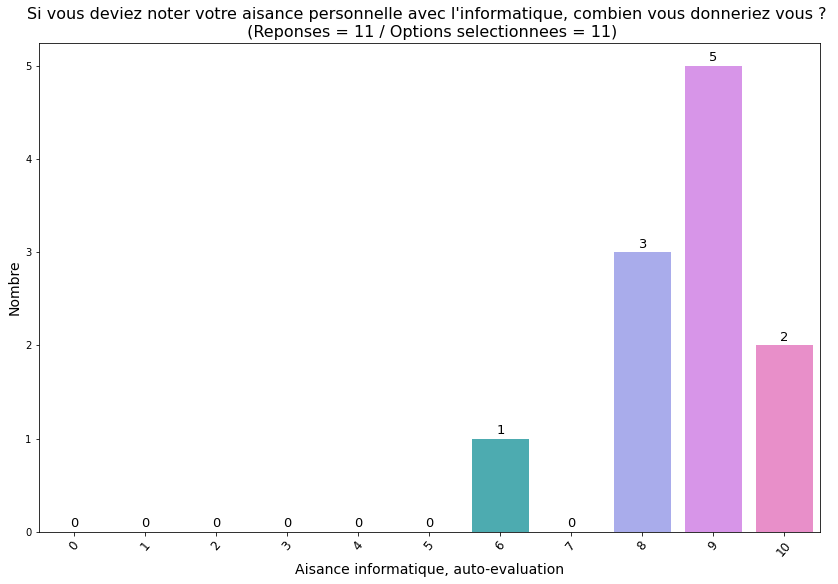

In [8]:
myfig.plot_mbr_barchart(qtitle = q_aisance, list_labels = aisance_lbls, list_dfs = aisance_dtfs, bar_xlabel = "Aisance informatique, auto-evaluation", bar_ylabel = 'Nombre', nb_responses = nbresp_subset)

# TODO : Pouvoir enlever une categorie

# L'age a-t-il a voir dans l'aisance informatique ?

In [9]:
# Question sur l'age
gidx1 = 0
qid1 = 'BZsILkKYGzKQ'
# Question sur l'aisance
gidx2 = 1
qid2 = 'bK9T5Pen4AB0'

q_age, age_lbls, age_dtfs, q_aisance, aisance_lbls, aisance_byage_dtfs = tfs.get_x_res(gidx1=gidx1,qid1=qid1, gidx2=gidx2,qid2=qid2)


Quel est votre âge ?:
  ['Moins de 18 ans', 'Entre 18 et 25 ans', 'Entre 26 et 35 ans', 'Entre 36 et 50 ans', 'Entre 51 et 75 ans', '76 ans et plus']
Si vous deviez noter votre aisance personnelle avec l'informatique, combien vous donneriez vous ?:
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


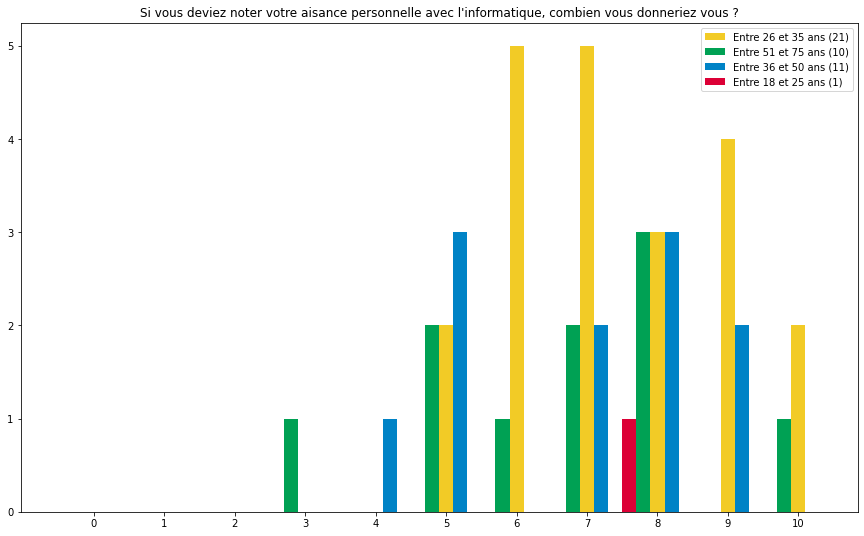

In [10]:
cln_df_aisance_byage = myfig.plot_mbr_multiple_bars(qtitle = q_aisance, xlist_labels = aisance_lbls, legends = age_lbls, list_sub_dtfs = aisance_byage_dtfs, bar_indxs = [-2,0,1,-1])

## Bilan :

Pas assez de resultats pour obtenir des tendances fiables

Ou pas de tendances a deceler.

_Who knows ?_

In [11]:
# recuperer les resultats aux questions, les options possibles et les noms des questions
q_apprentissage, l_apprentissage_lbl, l_apprentissage_dtfs, q_age, age_lbls, age_byapprentissage_dtfs = tfs.get_x_res(gidx1=2,qid1='NXnMNhHW9dGK', gidx2=0,qid2='BZsILkKYGzKQ')

A l'école, vous a-t-on enseigné l'informatique ?:
  ['oui', 'non']
Quel est votre âge ?:
  ['Moins de 18 ans', 'Entre 18 et 25 ans', 'Entre 26 et 35 ans', 'Entre 36 et 50 ans', 'Entre 51 et 75 ans', '76 ans et plus']


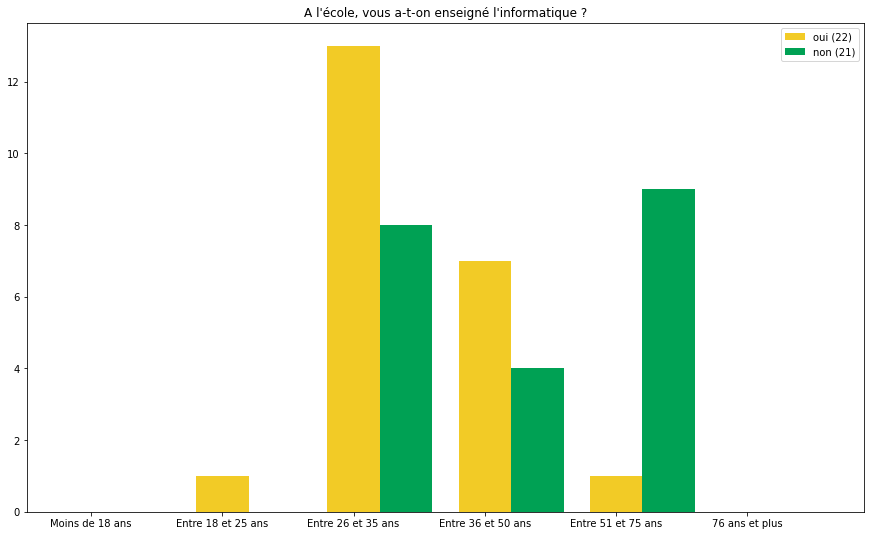

In [12]:
age_byapprentissage_dtfs = myfig.plot_mbr_multiple_bars(qtitle = q_apprentissage, xlist_labels = age_lbls, legends = l_apprentissage_lbl, list_sub_dtfs = age_byapprentissage_dtfs, bar_indxs = [0,1])

## Bilan :
Si on a 30 ans, il y a de fortes chances qu'on n'ait pas recu d'education informatique.

Et l'experience d'enseignement qu'on a eu, quand on a un peu plus de 30 ans, etait principalement ce qu'on appelle de la litteratie. C'est a dire qu'au college, on nous apprenait comment fonctionnait certains outils informatique comme Word, Excel ou encore un moteur de recherche (Yahoo, Lycos, Google), mais on ne nous apprenait pas vraiment comment fonctionne les machine : l'electronique et l'informatique qui supporte tous les outils numeriques ; le langage binaire ; la pensee modulaire ; etc.

Considerons donc les [statistiques de l'INSEE](https://www.insee.fr/fr/statistiques/3676623?sommaire=3696937), concernant l'age de la population active Francaise : 

|  | Femmes | Hommes | Total |
| --- | --- | --- | --- |
| 15 a 24 ans | 1 248 | 1 532 | 2 780
| 25 à 49 ans | 8 703 | 9 435 | 18 138
| 50 à 64 ans | 4 142 | 4 228 | 8 370
| Total 15 à 64 ans | 14 094 | 15 194 | 29 288
| 15 ans ou plus | 14 263 | 15 404 | 29 668



In [13]:
tauxdactif_entre_25_et_49ans = (18138+8370) / 29288 * 100
print("Taux d'actifs de plus de 25 ans (parmis les 15-64 ans) : "+str(tauxdactif_entre_25_et_49ans))

Taux d'actifs de plus de 25 ans (parmis les 15-64 ans) : 90.5080579076755


90% des actifs francais ont plus de 25 ans.

On peut facilement imaginer que plus de 70% a plus de 35 ans et n'a donc pas beneficie d'un enseignement informatique convenable pour apprehender le monde qui les entoure dorenavant.

## TODO : Oter les specialistes IT de ce graph

## TODO : Enlever ceux dont c'est la specialite

# Ou bien fau-il avoir appris l'informatique a l'ecole pour etre a l'aise avec ?

In [14]:
# Premier regroupement de reponse :
gidx1 = 2
qid1 = 'NXnMNhHW9dGK'
# Pour resultat par tranche : Aisance
g_idx2 = 1
q_id2 = 'bK9T5Pen4AB0'

# Get labels and results
q_apprentissage, l_apprentissage_lbl, l_apprentissage_dtfs, q_aisance, aisance_lbls, aisance_byapprentissage_dtfs = tfs.get_x_res(gidx1=gidx1,qid1=qid1, gidx2=gidx2,qid2=qid2)

A l'école, vous a-t-on enseigné l'informatique ?:
  ['oui', 'non']
Si vous deviez noter votre aisance personnelle avec l'informatique, combien vous donneriez vous ?:
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


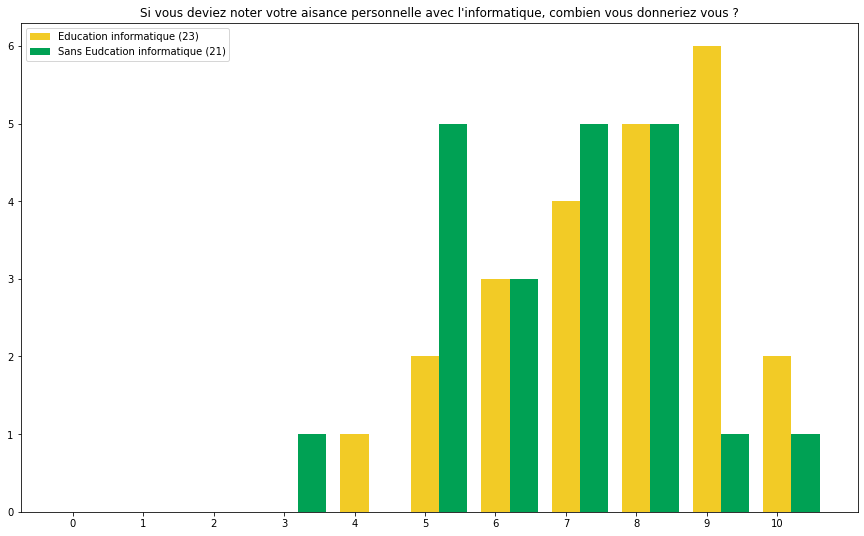

In [15]:
# Modifier les labels pour etre plus parlants : 
l_apprentissage_lbl[0] = "Education informatique"
l_apprentissage_lbl[1] = "Sans Eudcation informatique"
# Appel fonction mbr multiple bar charts
cln_df_aisance_byageapprentissage = myfig.plot_mbr_multiple_bars(qtitle = q_aisance, xlist_labels = aisance_lbls, legends = l_apprentissage_lbl, list_sub_dtfs = aisance_byapprentissage_dtfs, bar_indxs = [0, 1])

In [16]:
df_aisancebyapprentissage_moyennes = mbrpl.print_moyennes_xresults_mbarchart(df_xplot = cln_df_aisance_byageapprentissage, listofnotes = aisance_lbls)

Moyenne 'Education informatique' = 7.565217391304348
Moyenne 'Sans Eudcation informatique' = 6.666666666666667


## Bilan

Apprendre l'informatique a l'ecole, ca aide, apparemment, mais ca ne fait pas tout. 

Ceux qui ne l'ont pas appris a l'ecole ne sont un peu moins a l'aise.

Il y a plus de chance qu'il se donne une note inferieure a 8, mais on constate que certaines personnes qui ont appris l'informatique a l'ecole peuvent pourtant se sentir desemparees face aux ecrans.

# Influence de la specialite sur l'aisance

In [17]:
gidx = 0
qid = 'OnnjlaZauNJ0'

# Get labels and results
qScpecialite, spec_lbls, spec_dtfs = tfs.get_results(gidx=gidx,qid=qid)

# Rappel des options :
print("Rappel des specialites possibles :\n ",spec_lbls)

Rappel des specialites possibles :
  ["Services d'informations", 'Budget / Finance / Compta', 'Juridique / Droits', 'Bâtiment / Sécurité physique', 'Développement commercial', 'Communication / Partenariats / Evénementiel', 'Ressources humaines / Santé / Social', 'Restauration / Tourisme', 'Other']


In [18]:
# On va reduire la liste des labels a deux : Les specialistes et les nons specialistes
liste_binaire_spec_labels = ['Specialistes IT' , 'Non Specialistes IT']
liste_binaire_spec_dtfs = mbrpl.faire_deux_groupes(groupe1_indexs = [0], input_dtf_list = spec_dtfs)

In [19]:
g_idx2 = 1
q_id2 = 'bK9T5Pen4AB0'

# Trouver quel age a vote pour quelle aisance
q_aisance, aisance_lbls, aisance_byspecialite_dtfs = tfs.get_sub_reponses(subq_gidx=g_idx2, subq_qid=q_id2, inputdtfs = liste_binaire_spec_dtfs) 
# Rappel des options :
print("Rappel des options possibles :\n ",aisance_lbls)

Rappel des options possibles :
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


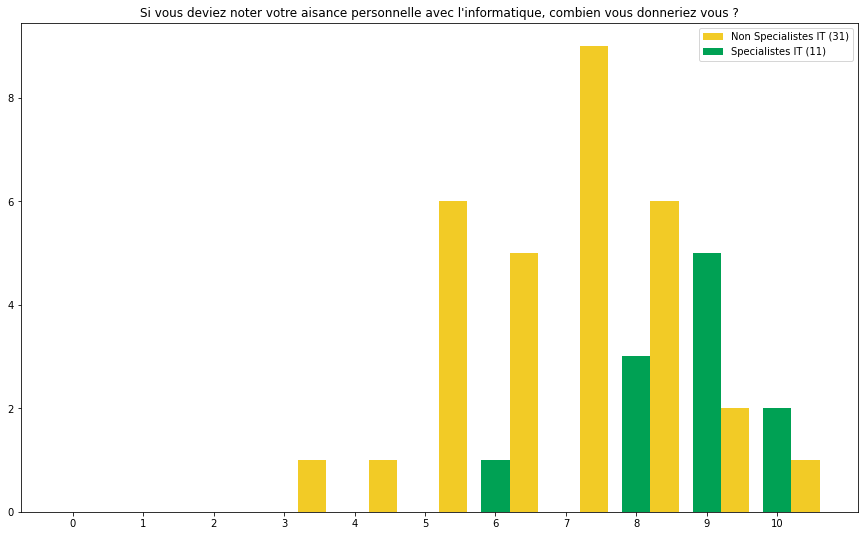

In [20]:
cln_df_aisance_byspecialite_binaire = myfig.plot_mbr_multiple_bars(qtitle = q_aisance, xlist_labels = aisance_lbls, legends = liste_binaire_spec_labels, list_sub_dtfs = aisance_byspecialite_dtfs, bar_indxs = [0, 1])

In [21]:
df_aisancebyspec_moyennes = mbrpl.print_moyennes_xresults_mbarchart(df_xplot = cln_df_aisance_byspecialite_binaire, listofnotes = aisance_lbls)

Moyenne 'Non Specialistes IT' = 6.645161290322581
Moyenne 'Specialistes IT' = 8.636363636363637


# Est-ce que le temps qu'on passe dessus influe ?

In [22]:
gidx = 1
qid = 'EyykV9VMHRBS'

# Get labels and results
qtimetoIT, it_time_lbls, it_time_dtf = tfs.get_results(gidx=gidx,qid=qid)

# Rappel des options :
print("Rappel des temps d'informatique possibles :\n ",it_time_lbls)

Rappel des temps d'informatique possibles :
  ['Dans la vie privée', 'Dans la vie professionnelle', 'Tout le temps', 'Le moins possible']


In [23]:
g_idx2 = 1
q_id2 = 'bK9T5Pen4AB0'

# Trouver quel age a vote pour quelle aisance
q_name, q_labels, aisance_byx_dtfs = tfs.get_sub_reponses(subq_gidx=g_idx2, subq_qid=q_id2, inputdtfs = it_time_dtf) 
# Rappel des options :
print("Rappel des options possibles :\n ",q_labels)

Rappel des options possibles :
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [24]:
# Get labels and results
q_timetoIT, l_timetoIT_lbl, l__timetoIT_dtfs, q_aisance, aisance_lbls, aisance_byapprentissage_dtfs = tfs.get_x_res(gidx1=1,qid1='EyykV9VMHRBS', gidx2=1,qid2='bK9T5Pen4AB0')

Quand utilisez-vous le plus souvent des outils numériques ?:
  ['Dans la vie privée', 'Dans la vie professionnelle', 'Tout le temps', 'Le moins possible']
Si vous deviez noter votre aisance personnelle avec l'informatique, combien vous donneriez vous ?:
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


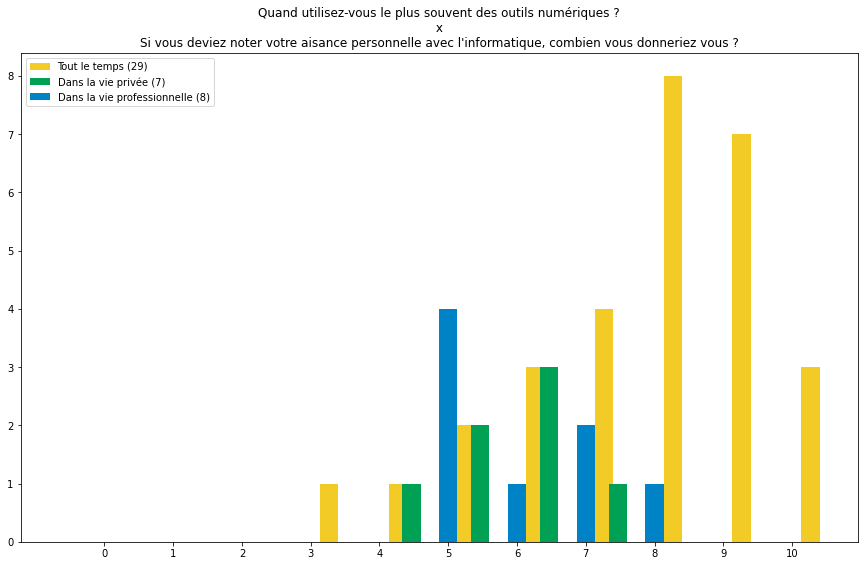

In [25]:
cln_df_xresults = myfig.plot_mbr_multiple_bars(qtitle = qtimetoIT + '\n x \n' + q_aisance, xlist_labels = aisance_lbls, legends = it_time_lbls, list_sub_dtfs = aisance_byx_dtfs, bar_indxs = [-2,0,1,-1])

In [26]:
df_aisancebytimetoit_moyennes = mbrpl.print_moyennes_xresults_mbarchart(df_xplot = cln_df_xresults, listofnotes = aisance_lbls)

Moyenne 'Tout le temps' = 7.586206896551724
Moyenne 'Dans la vie privée' = 6.571428571428571
Moyenne 'Dans la vie professionnelle' = 6.0


## Bilan : 

Finalement, ceux qui s'en sortent le mieux sont ceux qui pratiquent le plus et on pourrait meme se dire que ceux qui decide de l'utiliser dans la vie privee sont generalement plus enclin a etre a l'aise car ils s'y sentent peut-etre moins contraints

# Croiser plaisir et aisance

In [27]:
q_id = 'r14e6RHnmlxH'

# Get labels and results
q_Plaisir, it_plaisir_lbls, it_plaisir_dtf = tfs.get_results(gidx=1,qid=q_id)

# Rappel des options :
print("Rappel des temps d'informatiques possibles :\n ",it_plaisir_lbls)

Rappel des temps d'informatiques possibles :
  ['Plaisir', 'Nécessité']


In [28]:
g_idx2 = 1
q_id2 = 'bK9T5Pen4AB0'

# Trouver quel age a vote pour quelle aisance
q_name, q_labels, aisance_byx_dtfs = tfs.get_sub_reponses(subq_gidx=g_idx2, subq_qid=q_id2, inputdtfs = it_plaisir_dtf) 
# Rappel des options :
print("Rappel des options possibles :\n ",q_labels)

Rappel des options possibles :
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


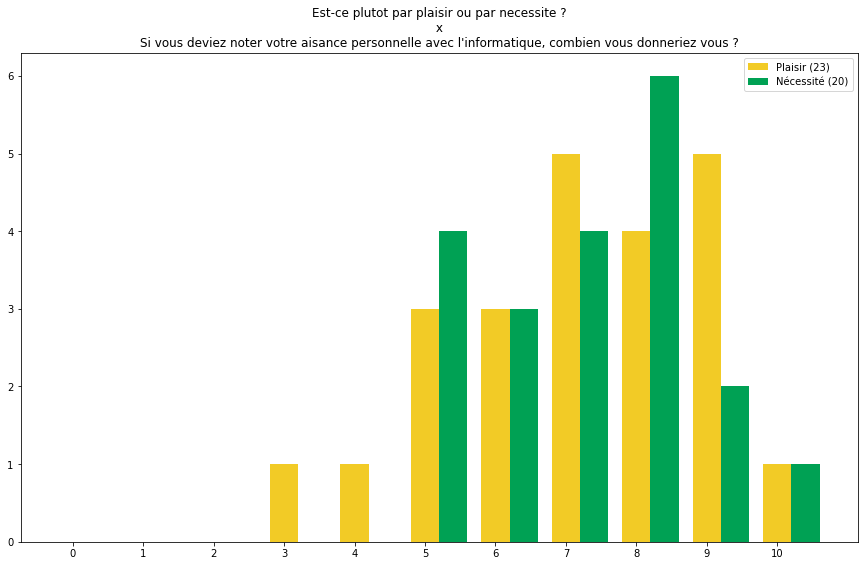

In [29]:
cln_df_aisance_byspecialite_binaire = myfig.plot_mbr_multiple_bars(qtitle = q_Plaisir + '\n x \n' + q_aisance, xlist_labels = aisance_lbls, legends = it_plaisir_lbls, list_sub_dtfs = aisance_byx_dtfs, bar_indxs = [0, 1])

In [30]:
df_aisancebytimetoit_moyennes = mbrpl.print_moyennes_xresults_mbarchart(df_xplot = cln_df_aisance_byspecialite_binaire, listofnotes = aisance_lbls)

Moyenne 'Plaisir' = 7.043478260869565
Moyenne 'Nécessité' = 7.1


## TODO : List des moyennes en Top parametre pour comparer le comparable


## Bilan : 

Comme on pourrait s'y attendre, ceux qui prennent plaisir a utiliser les outils numeriques s'en sortent en moyenne mieux que ceux qui le font par necessite. Ces derniers se sentent necessairement plus contraints par l'obligation de devoir utiliser quelque chose pour lequel ils n'ont pas d'appetence particuliere.

Evidemment ca ne veut pas dire que tous ceux qui declarent un usage "necessaire" sont moins a l'aise. Ce ne sont que des probabilites et on a toujours des chances d'y echapper.

Cependant ces elements marquent la necessite de rendre l'informatique plus seduisante. Pas simplement en la renommant "numerique", comme on le ferait une entreprise apres un scandale, mais alimentant et en diffusant une culture de l'informatique qu'on serait fier de promouvoir. En organisant des evenements de mediation pour permettre au grand public d'aborder ces enjeux. Quel que soit son age, son origine sociale ou geographique.

# Time to IT (EyykV9VMHRBS)
 
 TODO : Voir s'il y a des gens qui utilisent tout le temps l'informatique, mais qui pourtant prenne ca pour une contrainte





# Nombre d'equipement (DeUtJwpfRd1O) 

 TODO : Recuperer la moyenne du nombre d'equipement des moins aises en informatique

 TODO : Ou bien de ceux qui font appel a des proches en cas de probleme





# Impression de maitriser ses donnees personnelles (IihvSDBsSpUH)

 TODO : Plotter sur un meme graph en fonction de l'age

# TODO : Plotter sur un meme graph en fonction du metier

# UTILE

In [34]:
# On recupere le nom de la questions : ['Plaisir', 'Nécessité'], car il nous permettra de filtrer les resultats :
question_plaisir = tfs.get_q_title(gidx=1,qid='r14e6RHnmlxH')
question_benedection = tfs.get_q_title(gidx=1,qid='rT2VhptKefBR')

# On ne conserve que les reponses = 'Nécessité' pour la question "question_plaisir"
df_necessiteux = form_responses[form_responses[question_plaisir] == 'Nécessité']
# On ne conserve que les reponses = 'Bénédiction' pour la question "question_benedection"
df_necessiteux_qui_aiment_ca = df_necessiteux[df_necessiteux[question_benedection] == 'Bénédiction']

# On affiche le nombre de lignes du tableau qu'on vient de filtrer pour savoir combien de personnes ont selectionne les deux reponses attendues aux questions :
nombre_de_moine_zen_ou_sm = df_necessiteux_qui_aiment_ca.shape[0]
# On affiche une phrase avec le resultat dedans
print("Il y a " + str(nombre_de_moine_zen_ou_sm) + " moines zen ou sado masochistes qui ont repondu")

Il y a 7 moines zen ou sado masochistes qui ont repondu


TODO : voir la repartition en fonction de s'ils avaient ou non vu les videos top culture 2020

In [35]:
# Get labels and results
q_alreadyhooked, l_alreadyhooked_lbl, l__alreadyhooked_dtfs, q_interetstream, interetstream_lbls, interetstream_byapprentissage_dtfs = tfs.get_x_res(gidx1=3,qid1='SfiZNZEpZLSi', gidx2=3,qid2='I3G4Wsg6JAGd')

Durant l'année 2020 avez-vous eu l'occasion de voir l'une des vidéos listées sur l'image ?:
  ['Oui', 'Non', 'Peut-etre']
S'il existait un endroit sur Internet où trouver toutes les vidéos postées par les institutions culturelles (théâtre, spectacles vivants, sciences, séminaires, conférences, etc.), iriez-vous le consulter de temps en temps ?:
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


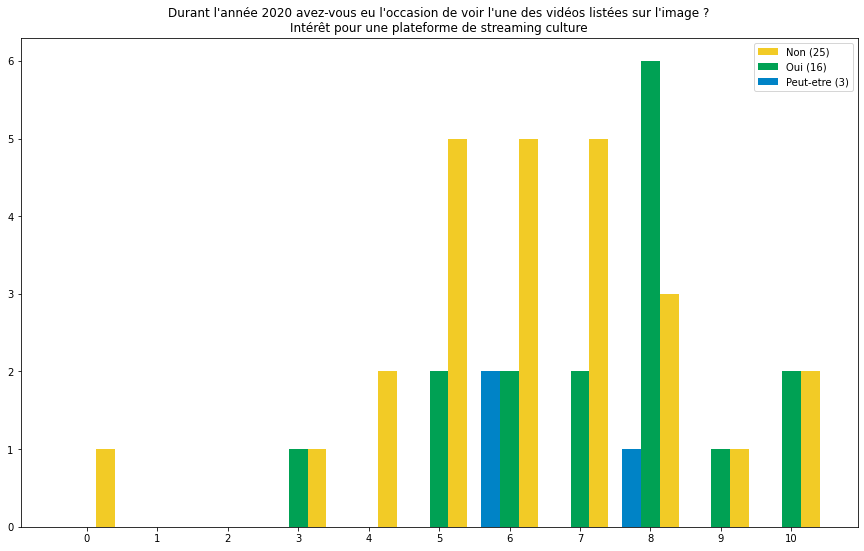

In [36]:
cln_df_interet_byalreadyhooked = myfig.plot_mbr_multiple_bars(qtitle = q_alreadyhooked + "\n" + "Intérêt pour une plateforme de streaming culture", xlist_labels = interetstream_lbls, legends = l_alreadyhooked_lbl, list_sub_dtfs = interetstream_byapprentissage_dtfs, bar_indxs = [0, 1, -1])

In [37]:
df_interetifalreadyhooked_moyennes = mbrpl.print_moyennes_xresults_mbarchart(df_xplot = cln_df_interet_byalreadyhooked, listofnotes = interetstream_lbls)

Moyenne 'Non' = 6.16
Moyenne 'Oui' = 7.25
Moyenne 'Peut-etre' = 6.666666666666667


Si on voulait faire une moyenne de top 10

In [38]:
print (l_alreadyhooked_lbl)

['Oui', 'Non', 'Peut-etre']


In [40]:
resultats_tries = form_responses.sort_values(by = [q_interetstream], ascending=False)

consommateurs_culture_actifs = resultats_tries[resultats_tries[q_alreadyhooked] == 'Oui'].head(10)
public_eloigne = resultats_tries[resultats_tries[q_alreadyhooked] == 'Non'].head(10)
proche_peripherie = resultats_tries[resultats_tries[q_alreadyhooked] == 'Peut-etre'].head(10)

moyenne_top10_consommateurs_actifs = consommateurs_culture_actifs[q_interetstream].mean()
moyenne_top10_public_eloigne = public_eloigne[q_interetstream].mean()
moyenne_top10_proche_peripherie = proche_peripherie[q_interetstream].mean()

print(str(moyenne_top10_consommateurs_actifs))
print(str(moyenne_top10_public_eloigne))
print(str(moyenne_top10_proche_peripherie))

8.4
8.1
6.666666666666667


## 4.D - 

Cette question n'a été posée à personne, je mettrais donc pas le code associé

- id =  9pyb2EM15zBg 
- Rating

In [1]:
# Retourne le titre de la question, la liste des options possibles, la liste des resultats associes a chaque option (un tableau de resultats par option possible)
q_ratingvid_cul, ratingvid_notes, ratingvid_dtf = tfs.get_results(gidx=3, qid='9pyb2EM15zBg')

nbvues = 0
for i in range(len(ratingvid_dtf)) :
    nbvues += ratingvid_dtf[i].shape[0]

if nbvues > 0 :
    myfig.plot_mbr_barchart(qtitle = q_ratingvid_cul, list_labels = ratingvid_notes, list_dfs = ratingvid_dtf, bar_xlabel = "Note de l'experience de visionnage", bar_ylabel = 'Nombre', nb_responses = nb_responses, fresh_lbls = fresh_lbls)

else : 
    print('Nobody watched your damn videos')
    print("Personne n'a essayé de regarder une de ces vidéos au beau milieu du questionnaire")

NameError: name 'tfs' is not defined